In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '25_08_2021(Vaccine_Problem).ipynb',
 'All.jpg',
 'df.html',
 'df.xlsx',
 'h1n1_vaccine_prediction.csv',
 'Health worker Vaccination.jpeg',
 'In_the_Age_group_of_35_44_years.jpg',
 'People worried about getting sick Vs getting Vaccines.jpeg',
 'Problem Statement_LogisticReg.pdf',
 'Vaccine Problem.docx',
 'Vaccine.xlsx',
 '~$ccine Problem.docx',
 '~WRL1262.tmp']

Columns                   | Description
--------------------------|-------------------------------------------------------
unique_id                 | Unique identifier for each respondent
h1n1_worry                | Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
h1n1_awareness            | Signifies the amount of knowledge or understanding the respondent has about h1n1 flu - (0,1,2) - 0=No knowledge, 1=little knowledge, 2=good knowledge
antiviral_medication      | Has the respondent taken antiviral vaccination - (0,1)
contact_avoidance         | Has avoided any close contact with people who have flu-like symptoms - (0,1)
bought_face_mask          | Has the respondent bought mask or not - (0,1)
wash_hands_frequently     | Washes hands frequently or uses hand sanitizer -(0,1)
avoid_large_gatherings    | Has the respondent reduced time spent at large gatherings - (0,1)
reduced_outside_home_cont | Has the respondent reduced contact with people outside their own house - (0,1)
avoid_touch_face          | Avoids touching nose, eyes, mouth - (0,1)
dr_recc_h1n1_vacc         | Doctor has recommended h1n1 vaccine - (0,1)
dr_recc_seasonal_vacc     | The doctor has recommended seasonalflu vaccine -(0,1)
chronic_medic_condition   | Has any chronic medical condition - (0,1) 
cont_child_undr_6_mnth    | Has regular contact with child the age of 6 months -(0,1)
is_health_worker          | Is respondent a health worker - (0,1)
has_health_insur          | Does respondent have health insurance - (0,1)
is_h1n1_vacc_effective    | Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective)
is_h1n1_risky             | What respondents think about the risk of getting illwith h1n1 in the absence of the vaccine- (1,2,3,4,5)-(1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky)
sick_from_h1n1_vacc       | Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried,5Respondent is very worried) -
is_seas_vacc_effective    | Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective,5=Thinks it is highly effective)
is_seas_flu_risky         | What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky)                                                                                                      
sick_from_seas_vacc       | Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried)
age_bracket               | Age bracket of the respondent - (18 - 34 Years, 35 - 44 Years, 45 - 54 Years, 55 - 64 Years, 64+ Years)
qualification             | Qualification/education level of the respondent as per their response -(<12 Years, 12 Years, College Graduate, Some College) 
race                      | Respondent's race - (White, Black, Other or Multiple ,Hispanic)
sex                       | Respondent's sex - (Female, Male)
income_level              | Annual income of the respondent as per the 2008 poverty Census - (<= 75000−AbovePoverty,> 75000−AbovePoverty,>75000, Below Poverty)
marital_status            | Respondent's marital status - (Not Married, Married)
housing_status            | Respondent's housing status - (Own, Rent)
employment                | Respondent's employment status - (Not in Labor Force, Employed, Unemployed) 
census_msa                | Residence of the respondent with the MSA(metropolitan statistical area)(Non-MSA, MSANot Principle, CityMSA-Principle city) - (Yes, no)   
no_of_adults              | Number of adults in the respondent's house (0,1,2,3) - (Yes, no)
no_of_children            | Number of children in the respondent's house(0,1,2,3)- (Yes, No)
h1n1_vaccine              | Dependent variable)Did the respondent received the h1n1 vaccine or not(1,0) - (Yes, No)                                                                                                                
                                                                                                                        

In [3]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")

In [4]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
# import sweetviz as sv
# ana=sv.analyze(df)
# ana.show_html("df.html")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
df.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age_bracket     26707 non-null  object
 1   qualification   25300 non-null  object
 2   race            26707 non-null  object
 3   sex             26707 non-null  object
 4   income_level    22284 non-null  object
 5   marital_status  25299 non-null  object
 6   housing_status  24665 non-null  object
 7   employment      25244 non-null  object
 8   census_msa      26707 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

### Missing Value:

In [9]:
df["h1n1_worry"].isnull().sum()

92

In [10]:
df["h1n1_worry"].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [11]:
df["h1n1_worry"] = df["h1n1_worry"].fillna(value=0)

In [12]:
df["h1n1_worry"].isnull().sum()

0

Null values have been replaced by 0 as these people are not worried that's why they haven't filled the data.

In [13]:
df["h1n1_awareness"].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [14]:
df["h1n1_awareness"].isnull().sum()

116

In [15]:
df["h1n1_awareness"] = df["h1n1_awareness"].fillna(value=df["h1n1_awareness"].median())

In [16]:
df["h1n1_awareness"].mode()

0    1.0
dtype: float64

In [17]:
df["h1n1_awareness"].value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [18]:
df["h1n1_awareness"].isnull().sum()

0

In [19]:
df["antiviral_medication"].value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [20]:
df["antiviral_medication"].isnull().sum()

71

In [21]:
df["antiviral_medication"]=df["antiviral_medication"].fillna(value=0)

In [22]:
df["antiviral_medication"].isnull().sum()

0

In [23]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [24]:
df["contact_avoidance"].value_counts() 

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [25]:
df["contact_avoidance"] = df["contact_avoidance"].fillna(value=1)

In [26]:
df["bought_face_mask"].value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [27]:
df["bought_face_mask"].isnull().sum()

19

In [28]:
df["bought_face_mask"]=df["bought_face_mask"].fillna(value=0)

In [29]:
df["bought_face_mask"].isnull().sum()

0

In [30]:
df["wash_hands_frequently"].value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [31]:
df["wash_hands_frequently"].isnull().sum()

42

In [32]:
df["wash_hands_frequently"] = df["wash_hands_frequently"].fillna(value=df["wash_hands_frequently"].median())

In [33]:
df["wash_hands_frequently"].value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [34]:
df["avoid_large_gatherings"].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [35]:
df["avoid_large_gatherings"] = df["avoid_large_gatherings"].fillna(value=0)

In [36]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [37]:
df["reduced_outside_home_cont"].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [38]:
df["reduced_outside_home_cont"] = df["reduced_outside_home_cont"].fillna(value=df["reduced_outside_home_cont"].median())

In [39]:
df["reduced_outside_home_cont"].isnull().sum()

0

In [40]:
df["avoid_touch_face"].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [41]:
df["avoid_touch_face"] = df["avoid_touch_face"].fillna(value=1)

In [42]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [43]:
df["dr_recc_h1n1_vacc"].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

Doctor has recommended h1n1 vaccine - (0,1)  0:No, 1:Yes

In [44]:
df["dr_recc_h1n1_vacc"] = df["dr_recc_h1n1_vacc"].fillna(value=df["dr_recc_h1n1_vacc"].median())


In [45]:
df["dr_recc_seasonal_vacc"].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [46]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].fillna(value=df["dr_recc_seasonal_vacc"].median())

dr_recc_seasonal_vacc	The doctor has recommended seasonalflu vaccine -(0,1)

In [47]:
df["chronic_medic_condition"].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [48]:
df["chronic_medic_condition"].isnull().sum()

971

In [49]:
df["chronic_medic_condition"] =df["chronic_medic_condition"].fillna(value=0)

In [50]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [51]:
df["cont_child_undr_6_mnths"].value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [52]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].fillna(value=df["cont_child_undr_6_mnths"].median())

In [53]:
df["is_health_worker"].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [54]:
df["is_health_worker"]=df["is_health_worker"].fillna(value=df["is_health_worker"].median())

In [55]:
df["has_health_insur"].value_counts(dropna=False)

1.0    12697
NaN    12274
0.0     1736
Name: has_health_insur, dtype: int64

In [56]:
df["has_health_insur"] = df["has_health_insur"].fillna(value=0)

In [57]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [58]:
df["is_h1n1_vacc_effective"].value_counts(dropna=False)

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
NaN      391
Name: is_h1n1_vacc_effective, dtype: int64

Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective)

In [59]:
df["is_h1n1_vacc_effective"] = df["is_h1n1_vacc_effective"].fillna(value=3)

In [60]:
df["is_h1n1_vacc_effective"].value_counts(dropna=False)

4.0    11683
5.0     7166
3.0     5114
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [61]:
df["is_h1n1_risky"].value_counts(dropna=False)

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
NaN     388
Name: is_h1n1_risky, dtype: int64

What respondents think about the risk of getting illwith h1n1 in the absence of the vaccine- (1,2,3,4,5)-(1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky)

In [62]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].fillna(value=3)

In [63]:
df["is_h1n1_risky"].value_counts(dropna=False)

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1505
Name: is_h1n1_risky, dtype: int64

In [64]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [65]:
df["sick_from_h1n1_vacc"].value_counts(dropna=False)

2.0    9129
1.0    8998
4.0    5850
5.0    2187
NaN     395
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried,5Respondent is very worried) 

In [66]:
df["sick_from_h1n1_vacc"] = df["sick_from_h1n1_vacc"].fillna(value=3)

In [67]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [68]:
df["is_seas_vacc_effective"].value_counts(dropna=False)

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
NaN      462
Name: is_seas_vacc_effective, dtype: int64

Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective,5=Thinks it is highly effective.

In [69]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].fi llna(value=3)

In [70]:
df["qualification"].value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: qualification, dtype: int64

In [71]:
df["qualification"] = df["qualification"].fillna(value="Other")

In [72]:
df["qualification"].value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Other                1407
Name: qualification, dtype: int64

In [73]:
df["income_level"].value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: income_level, dtype: int64

In [74]:
df["income_level"] = df["income_level"].fillna(value="Other")

In [75]:
df["income_level"].value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
Other                         4423
Below Poverty                 2697
Name: income_level, dtype: int64

In [76]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV=AutoViz_Class()
# AV.AutoViz(r"D:\Training\Imarticus\PGA\PGA14\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")


In [77]:
df["marital_status"].value_counts(dropna=False)

Married        13555
Not Married    11744
NaN             1408
Name: marital_status, dtype: int64

In [78]:
df["marital_status"]=df["marital_status"].fillna(value="Other")

In [79]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status               2042
employment    

In [80]:
df["is_seas_risky"].value_counts(dropna=False)

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
NaN     514
Name: is_seas_risky, dtype: int64

What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky)

In [81]:
df["is_seas_risky"] = df["is_seas_risky"].fillna(value=3)

In [82]:
df["sick_from_seas_vacc"].value_counts(dropna=False)

1.0    11870
2.0     7633
4.0     4852
5.0     1721
NaN      537
3.0       94
Name: sick_from_seas_vacc, dtype: int64

Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried, 5=Respondent is very worried)

In [83]:
df["sick_from_seas_vacc"] = df["sick_from_seas_vacc"].fillna(value=3)

In [84]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status               2042
employment    

In [85]:
df["housing_status"].value_counts(dropna=False)

Own     18736
Rent     5929
NaN      2042
Name: housing_status, dtype: int64

In [86]:
df["housing_status"] = df["housing_status"].fillna(value="Other")

In [87]:
df["housing_status"].value_counts(dropna=False)

Own      18736
Rent      5929
Other     2042
Name: housing_status, dtype: int64

In [88]:
df["employment"].value_counts(dropna=False)

Employed              13560
Not in Labor Force    10231
NaN                    1463
Unemployed             1453
Name: employment, dtype: int64

In [89]:
df["employment"] = df["employment"].fillna(value="Other")

In [90]:
df["employment"].value_counts(dropna=False)

Employed              13560
Not in Labor Force    10231
Other                  1463
Unemployed             1453
Name: employment, dtype: int64

In [91]:
df["no_of_adults"].value_counts(dropna=False)

1.0    14474
0.0     8056
2.0     2803
3.0     1125
NaN      249
Name: no_of_adults, dtype: int64

In [92]:
df["no_of_adults"]=df["no_of_adults"].fillna(value=df["no_of_adults"].median())

In [93]:
df["no_of_children"].value_counts(dropna=False)

0.0    18672
1.0     3175
2.0     2864
3.0     1747
NaN      249
Name: no_of_children, dtype: int64

In [94]:
df["no_of_children"] = df["no_of_children"].fillna(value=df["no_of_children"].median())

In [95]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

#### All the null Values have been treated personally.

In [96]:
df.describe(percentiles=[0.01,0.02,0.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99])

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.612910,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.475418,3.838170,2.352117,2.367170,4.008238,2.724567,2.135845,0.887558,0.529599,0.212454
std,7709.791156,0.913676,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,0.499405,1.005239,1.278589,1.354871,1.085401,1.372204,1.325275,0.749980,0.925264,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1%,267.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2%,534.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3%,801.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
4%,1068.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5%,1335.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,2670.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [98]:
# df.select_dtypes(include="int"and"float").describe(percentiles=[0.01,0.02,0.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

In [99]:
df.drop(columns=["unique_id"],inplace=True)

In [100]:
df.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age_bracket     26707 non-null  object
 1   qualification   26707 non-null  object
 2   race            26707 non-null  object
 3   sex             26707 non-null  object
 4   income_level    26707 non-null  object
 5   marital_status  26707 non-null  object
 6   housing_status  26707 non-null  object
 7   employment      26707 non-null  object
 8   census_msa      26707 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


#### Dummy Creation:

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [102]:
df["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [103]:
df.drop(columns=["marital_status","housing_status","census_msa","no_of_children","no_of_adults"],inplace=True)

In [104]:
df1 = pd.get_dummies(df,columns=["age_bracket","qualification","race","sex","income_level","employment"],drop_first=True)

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h1n1_worry                      26707 non-null  float64
 1   h1n1_awareness                  26707 non-null  float64
 2   antiviral_medication            26707 non-null  float64
 3   contact_avoidance               26707 non-null  float64
 4   bought_face_mask                26707 non-null  float64
 5   wash_hands_frequently           26707 non-null  float64
 6   avoid_large_gatherings          26707 non-null  float64
 7   reduced_outside_home_cont       26707 non-null  float64
 8   avoid_touch_face                26707 non-null  float64
 9   dr_recc_h1n1_vacc               26707 non-null  float64
 10  dr_recc_seasonal_vacc           26707 non-null  float64
 11  chronic_medic_condition         26707 non-null  float64
 12  cont_child_undr_6_mnths         

In [106]:
df1  = df1.rename(columns={"qualification_< 12 Years":"qualification_less_than 12 Years",
           "income_level_> $75,000":"income_level_greater_than $75,000"})

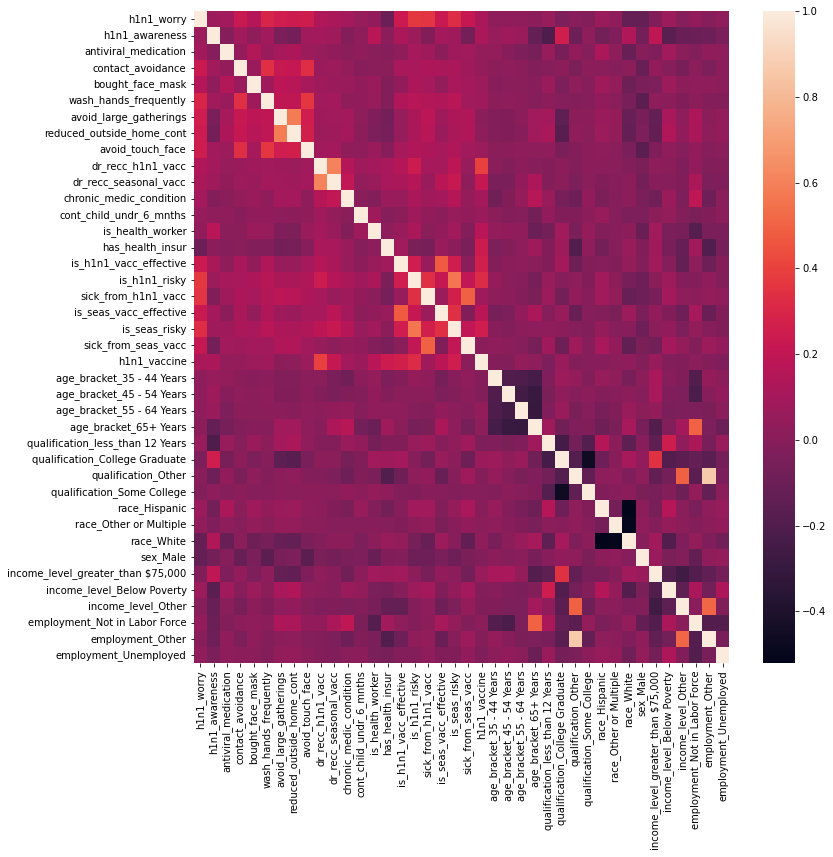

In [107]:
df1.corr()
plt.figure(figsize=(12,12))
corr = sns.heatmap(df1.corr())
plt.show()


#### Graphical Analysis

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   h1n1_worry                         26707 non-null  float64
 1   h1n1_awareness                     26707 non-null  float64
 2   antiviral_medication               26707 non-null  float64
 3   contact_avoidance                  26707 non-null  float64
 4   bought_face_mask                   26707 non-null  float64
 5   wash_hands_frequently              26707 non-null  float64
 6   avoid_large_gatherings             26707 non-null  float64
 7   reduced_outside_home_cont          26707 non-null  float64
 8   avoid_touch_face                   26707 non-null  float64
 9   dr_recc_h1n1_vacc                  26707 non-null  float64
 10  dr_recc_seasonal_vacc              26707 non-null  float64
 11  chronic_medic_condition            26707 non-null  flo

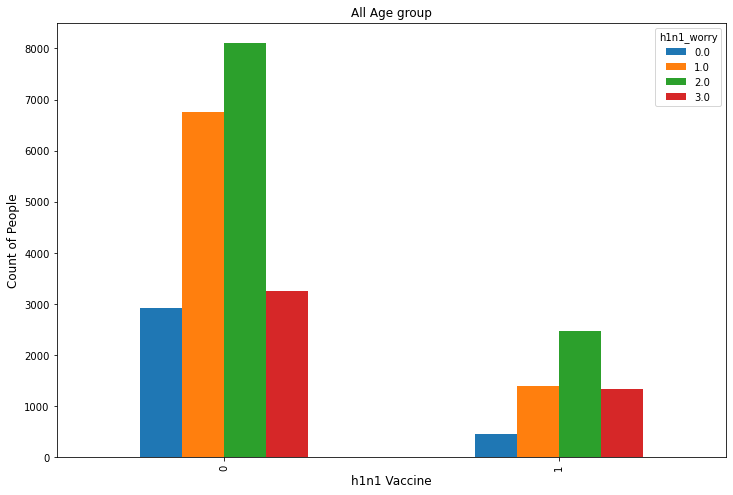

<Figure size 432x288 with 0 Axes>

In [134]:
df1.pivot_table(index='h1n1_vaccine',columns="h1n1_worry",values="age_bracket_35 - 44 Years",aggfunc="count").plot(kind="bar",figsize=(12,8))
plt.xlabel("h1n1 Vaccine",fontsize=(12))
plt.ylabel("Count of People",fontsize=(12))
plt.title("All Age group",fontsize=(12))
plt.show()
plt.savefig("In_the_Age_group_of_35_44_years.jpg")

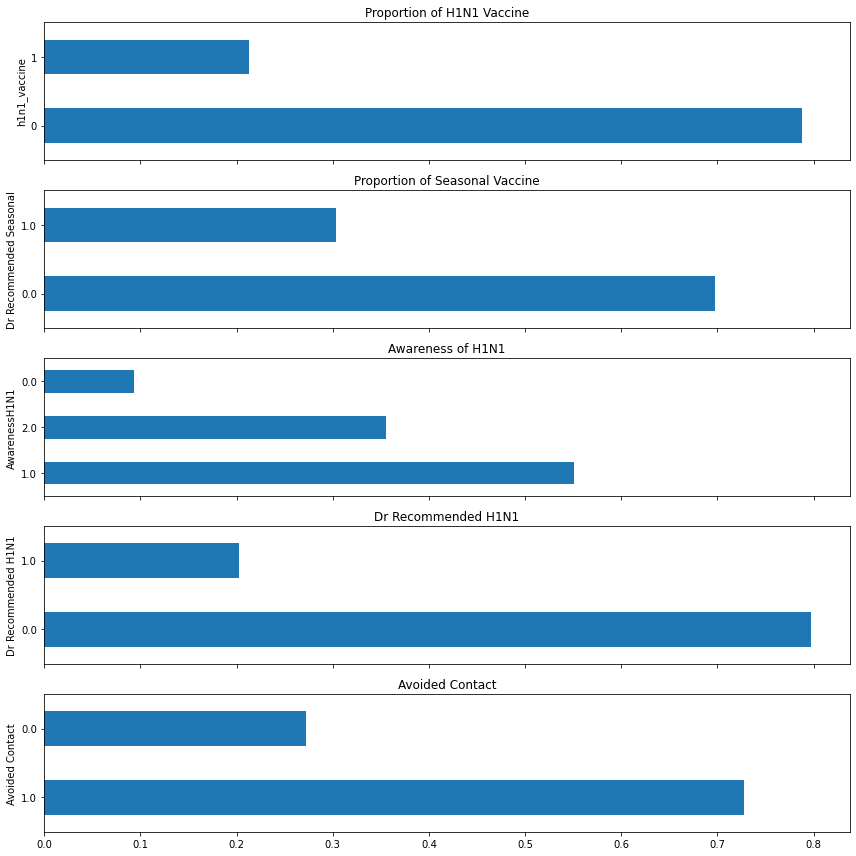

In [110]:
fig, ax = plt.subplots(5, 1, sharex=True,figsize=(12,12))

n_obs = df1.shape[0]

(df1['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(df1['dr_recc_seasonal_vacc']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("Dr Recommended Seasonal")

(df1['h1n1_awareness']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Awareness of H1N1", ax=ax[2])
)
ax[2].set_ylabel("AwarenessH1N1")

(df1['dr_recc_h1n1_vacc']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Dr Recommended H1N1", ax=ax[3])
)
ax[3].set_ylabel("Dr Recommended H1N1")

(df1['contact_avoidance']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Avoided Contact", ax=ax[4])
)
ax[4].set_ylabel("Avoided Contact")

fig.tight_layout()
plt.savefig("All.jpg")


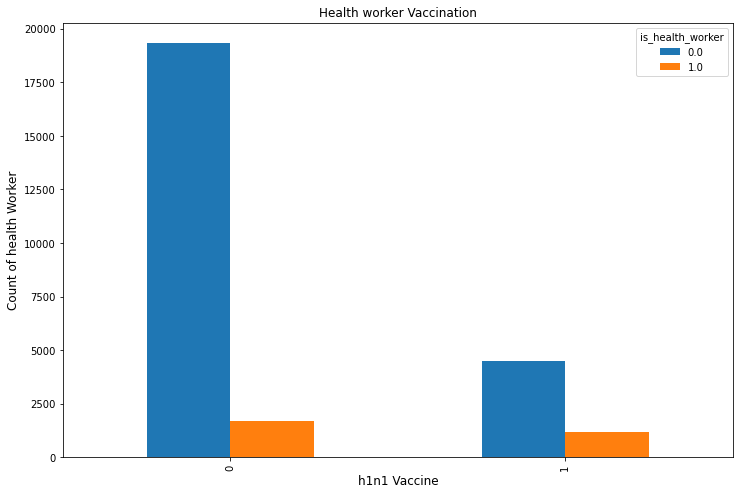

<Figure size 432x288 with 0 Axes>

In [111]:
df1.pivot_table(index='h1n1_vaccine',columns="is_health_worker",values="income_level_greater_than $75,000",aggfunc="count").plot(kind="bar",figsize=(12,8))
plt.xlabel("h1n1 Vaccine",fontsize=(12))
plt.ylabel("Count of health Worker",fontsize=(12))
plt.title("Health worker Vaccination",fontsize=(12))
plt.show()
plt.savefig("Health worker Vaccination.jpeg")

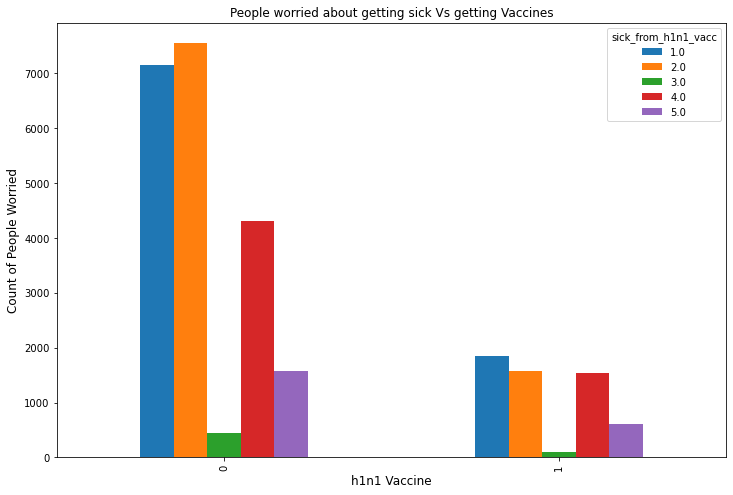

<Figure size 432x288 with 0 Axes>

In [112]:
df1.pivot_table(index='h1n1_vaccine',columns="sick_from_h1n1_vacc",values="has_health_insur",aggfunc="count").plot(kind="bar",figsize=(12,8))
plt.xlabel("h1n1 Vaccine",fontsize=(12))
plt.ylabel("Count of People Worried",fontsize=(12))
plt.title("People worried about getting sick Vs getting Vaccines",fontsize=(12))
plt.show()
plt.savefig("People worried about getting sick Vs getting Vaccines.jpeg")

#### Splitting X and Y into train and test

In [113]:
y = df1["h1n1_vaccine"]
X =df1.drop(["h1n1_vaccine"],axis=1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=1)

#### Standardizing the train and test value

In [115]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [116]:
#Standardized X_train using Z score
X_trainsc = pd.DataFrame(X_train_sc,columns=X_train.columns)
X_testsc = pd.DataFrame(X_test_sc,columns=X_test.columns)


In [117]:
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

In [118]:
#Standardized scale using minmax 
X_trainmms = pd.DataFrame(X_train_mms,columns=X_train.columns)
X_testmms = pd.DataFrame(X_test_mms,columns=X_test.columns)

#### Model 1 : Xgboost

In [119]:
xgb = XGBClassifier()

In [120]:
model = xgb.fit(X_train,y_train)

C:\Users\UTKARSH\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
print("Train Score", model.score(X_train,y_train))
print("Test Score", model.score(X_test,y_test))

Train Score 0.9243072643628972
Test Score 0.8497441657306877


#### Model 2 : Adaboost

In [122]:
adb = AdaBoostClassifier()


In [123]:
model2 = adb.fit(X_train,y_train)

In [124]:
print("Train Score", model2.score(X_train,y_train))
print("Test Score", model2.score(X_test,y_test))

Train Score 0.8482935701294533
Test Score 0.8502433545488581


#### Model 3 : KNN

In [125]:
knn = KNeighborsClassifier()

In [126]:
knn_sc = knn.fit(X_trainsc,y_train)
knn_mms = knn.fit(X_trainmms,y_train)

In [127]:
#Standard Scaler
print("Train Score", knn_sc.score(X_trainsc,y_train))
print("Test Score", knn_sc.score(X_testsc,y_test))

Train Score 0.8553011661495667
Test Score 0.8241607387994508


In [128]:
#MinMax
print("Train Score", knn_mms.score(X_trainmms,y_train))
print("Test Score", knn_mms.score(X_testmms,y_test))

Train Score 0.8676045790093078
Test Score 0.8232871583676525


In [128]:
#Standard Scaler
k=[]
train_ac=[]
test_ac=[]
for i in range(3, 40, 2):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn_sc = knn2.fit(X_trainsc,y_train)
    ac1=knn_sc.score(X_trainsc,y_train)
    ac2=knn_sc.score(X_testsc,y_test)
    k.append(i)
    train_ac.append(ac1)
    test_ac.append(ac2)
    print("Train accuracy {} and Test accuracy {} for k {}".format(ac1, ac2, i))
    

Train accuracy 0.8891088049641597 and Test accuracy 0.8075627105952826 for k 3
Train accuracy 0.8668556756178453 and Test accuracy 0.8175464869586921 for k 5
Train accuracy 0.8589386969080989 and Test accuracy 0.8274054661175589 for k 7
Train accuracy 0.8518776077885952 and Test accuracy 0.8308997878447523 for k 9
Train accuracy 0.8488819942227452 and Test accuracy 0.8318981654810932 for k 11
Train accuracy 0.8467422702471381 and Test accuracy 0.8345189067764882 for k 13
Train accuracy 0.8443885738739703 and Test accuracy 0.8357668788219144 for k 15
Train accuracy 0.8419278913020221 and Test accuracy 0.8357668788219144 for k 17
Train accuracy 0.8413394672087301 and Test accuracy 0.8380132285036815 for k 19
Train accuracy 0.8404300845190971 and Test accuracy 0.8371396480718832 for k 21
Train accuracy 0.8400021397239756 and Test accuracy 0.8362660676400848 for k 23
Train accuracy 0.839199743233123 and Test accuracy 0.835891676026457 for k 25
Train accuracy 0.839199743233123 and Test accu

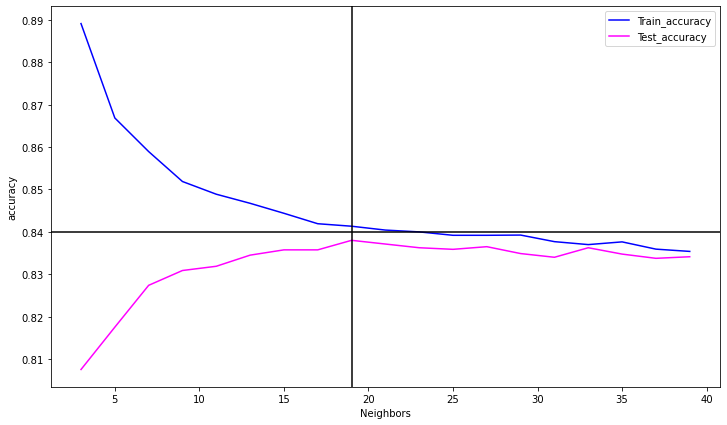

<Figure size 432x288 with 0 Axes>

In [132]:
plt.figure(figsize=(12,7))
plt.plot(k, train_ac, label="Train_accuracy", color="blue")
plt.plot(k, test_ac, label="Test_accuracy", color="magenta")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("accuracy")
plt.axvline(x = 19, color = 'black', label = 'axvline - full height')
plt.axhline(y = 0.84, color = 'black', label = 'axhline - full height')
plt.show()
plt.savefig("knn_standard.jpg")

In [130]:
#Minmax
k2=[]
train_ac2=[]
test_ac2=[]
for i in range(3, 40, 2):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn_mms = knn2.fit(X_trainmms,y_train)
    ac1=knn_mms.score(X_trainmms,y_train)
    ac2=knn_mms.score(X_testmms,y_test)
    k2.append(i)
    train_ac2.append(ac1)
    test_ac2.append(ac2)
    print("Train accuracy {} and Test accuracy {} for k {}".format(ac1, ac2, i))

Train accuracy 0.8889483256659891 and Test accuracy 0.8131785847997005 for k 3
Train accuracy 0.8676045790093078 and Test accuracy 0.8232871583676525 for k 5
Train accuracy 0.8573339039263935 and Test accuracy 0.8279046549357294 for k 7
Train accuracy 0.8534824007703007 and Test accuracy 0.830026207412954 for k 9
Train accuracy 0.8495239114154274 and Test accuracy 0.8330213403219768 for k 11
Train accuracy 0.8492564459184765 and Test accuracy 0.8343941095719456 for k 13
Train accuracy 0.844923504867872 and Test accuracy 0.8347685011855734 for k 15
Train accuracy 0.8427302877928747 and Test accuracy 0.8348932983901161 for k 17
Train accuracy 0.8420883706001926 and Test accuracy 0.8335205291401473 for k 19
Train accuracy 0.8418209051032417 and Test accuracy 0.8340197179583178 for k 21
Train accuracy 0.8402696052209265 and Test accuracy 0.8336453263446899 for k 23
Train accuracy 0.8383438536428801 and Test accuracy 0.832646948708349 for k 25
Train accuracy 0.8377554295495881 and Test accu

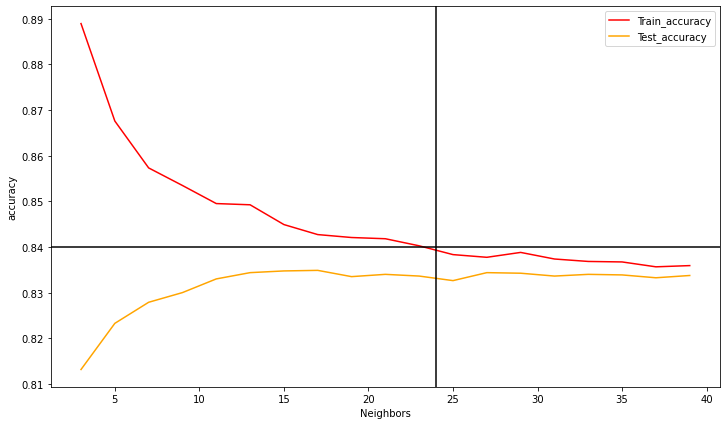

<Figure size 432x288 with 0 Axes>

In [133]:
plt.figure(figsize=(12,7))
plt.plot(k2, train_ac2, label="Train_accuracy", color="red")
plt.plot(k2, test_ac2, label="Test_accuracy", color="orange")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("accuracy")
plt.axvline(x = 24, color = 'black', label = 'axvline - full height')
plt.axhline(y = 0.84, color = 'black', label = 'axhline - full height')
plt.show()
plt.savefig("knn_minmax.jpg")

In [133]:
knn2 =KNeighborsClassifier(n_neighbors=19)

model3 =knn2.fit(X_trainsc,y_train)

print("Train Score", model3.score(X_trainsc,y_train))
print("Test Score", model3.score(X_testsc,y_test))

Train Score 0.8413394672087301
Test Score 0.8380132285036815


#### Model 4 : Decision Tree

In [134]:
dt = DecisionTreeClassifier()
model4 = dt.fit(X_train,y_train)

In [135]:
print("Train Score", model4.score(X_train,y_train))
print("Test Score", model4.score(X_test,y_test))

Train Score 0.9996790414036589
Test Score 0.7718707100960939


In [136]:
params_dt = {"criterion":['gini'], 
          "max_depth":[5,7,9,11], 
          "min_samples_split":[1,2,3,4], 
          "min_samples_leaf":[1,2,3,4,]}

In [137]:
dt2 = DecisionTreeClassifier()

dt_gs =GridSearchCV(dt2,params_dt,cv=10,verbose=1,n_jobs=-1)

In [138]:
dt_gs.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


C:\Users\UTKARSH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.83925377 0.83925377 0.83925377        nan 0.83925377
 0.83925377 0.83925377        nan 0.83925377 0.83925377 0.83925377
        nan 0.83925377 0.83925377 0.83925377        nan 0.84058998
 0.84069693 0.84069696        nan 0.84069702 0.84053653 0.8405365
        nan 0.84091092 0.84091092 0.84107141        nan 0.84091095
 0.84075044 0.8405365         nan 0.83256624 0.83288727 0.83310138
        nan 0.83213832 0.83336878 0.83245915        nan 0.83294055
 0.83219171 0.83251265        nan 0.83363613 0.83320816 0.83299417
        nan 0.82497054 0.82288441 0.82218894        nan 0.82534519
 0.82379367 0.82486362        nan 0.82684283 0.82593325 0.82652183
        nan 0.82957062 0.82935663 0.82940988]
  category=UserWarning


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4]},
             verbose=1)

In [139]:
dt_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [140]:
dt2_gs = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=3,min_samples_split=2)

dect = dt2_gs.fit(X_train,y_train)

In [141]:
print("Train Score", dect.score(X_train,y_train))
print("Test Score", dect.score(X_test,y_test))

Train Score 0.8551406868513962
Test Score 0.8474978160489205


#### Model 5 : RandomForest

In [142]:
rf = RandomForestClassifier()
model5 = rf.fit(X_train,y_train)

In [143]:
print("Train Score", model5.score(X_train,y_train))
print("Test Score", model5.score(X_test,y_test))

Train Score 0.9995720552048786
Test Score 0.8517409210033695


#### HyperParameter Tuning

In [144]:
params = {"n_estimators":[50,100], 
          "criterion":['gini'], 
          "max_depth":[5,7,9,11], 
          "min_samples_split":[2], 
          "min_samples_leaf":[1]}

rf2 = RandomForestClassifier()

In [145]:
rf_gs_sc = GridSearchCV(rf2,params,cv=5,verbose=1,n_jobs=-1)

In [146]:
rf_gs_sc.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             verbose=1)

In [147]:
rf_gs_sc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [148]:
rf2_sc = RandomForestClassifier(criterion='gini',max_depth=11,min_samples_leaf= 1,
                                min_samples_split= 2,n_estimators= 100)
rf_sc = rf2_sc.fit(X_train,y_train)

In [176]:
print("Train Score", rf_sc.score(X_train,y_train))
print("Test Score", rf_sc.score(X_test,y_test))

Train Score 0.896704825077565
Test Score 0.8536128790715088


In [183]:
train = {"Train_score":[xgb.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_trainsc,y_train),
                       dect.score(X_train,y_train),rf_sc.score(X_train,y_train)]}

In [189]:
df = pd.DataFrame({"Model":["Xgboost","Adaboost","KNN","DecisionTree","RandomForest"],
            "Train_Score":[xgb.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_trainsc,y_train),
                       dect.score(X_train,y_train),rf_sc.score(X_train,y_train)],
            "Test_Score":[xgb.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_testsc,y_test),
                       dect.score(X_test,y_test),rf_sc.score(X_test,y_test)]})

In [198]:
df.to_excel("df.xlsx")